# Homework 1

### Completed by Daniil Mikhailov (daanmikhailov@edu.hse.ru)

**Homework description**

Choose 2 different time series which represent financial data* (e.g. you can take open stock prices, close stock prices, net income)**. You will analyze and prepare in-sample and out-of-sample forecasts for each of the time series:

Perform 2 stationarity tests to check for stationarity.
Analyze autocorrelation of the time series with Ljung-Box test and ACF, PACF.
If the series turns out to be non-stationary, use a proper technique to reduce the series to stationary.
For the stationary (or reduced to stationary) series, choose proper ARMA model and build an in-sample forecast and out-of-sample forecast for future 10 periods.
If you didn’t have to reduce your time series to stationary – skip this step. Otherwise, for initially non-stationary series, choose proper ARIMA model and build an in-sample forecast and out-of-sample forecast for future 10 periods.
Prepare at least 3 useful regressors (both dummy and continuous - in total, there should be 3), choose ARMAX or ARIMAX*** model and build an in-sample forecast and out-of-sample forecast for future 10 periods.
Choose the best model for your time series based on chosen (by you) quality metric.
For each of the chosen time series you can receive up to 5 points: 5 points for the first one and 5 points for the second one. Remember to provide a textual analysis of obtained results and justify all you decision (e.g. answer such questions as: Why have I chosen such ARIMA orders? Why do I think this regressors is useful for my time series? Why have I used differencing to reduce my time series to stationary? Why have I chosen this quality metric for my out-of-sample forecasts? How does my model behave for in-sample forecasts? etc.) In the very end, you should also provide your thoughts on why your chosen best model performed the best in case of this particular time series.

As a result of this homework you should provide a .ipynb file (jupyter notebook) with your code and comments. Also add files with your data (or you can add links and instructions, how to get your data, to your ipynb file).



*You can take data of any frequency – daily, monthly and so on.

**You can not take Microsoft stock prices or net income (as it has been discussed during our lessons).

***You will learn ARMAX and ARIMAX models on lessons 7-8.

#### 1. Data Loading & Preparation

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the CSV datasets from CoinMarketCap:
- ETH: https://coinmarketcap.com/currencies/ethereum/
- TON: https://coinmarketcap.com/currencies/toncoin/

In [25]:
df1 = pd.read_csv("data\ETH_1Y_graph_coinmarketcap.csv", sep=";")
df2 = pd.read_csv("data\TON_1Y_graph_coinmarketcap.csv", sep=";")

In [26]:
df1.head()

,timestamp,price,volume
0,2023-03-13 04:00:00,1590.831187,1.571147e+10
1,2023-03-14 04:00:00,1680.295255,1.615978e+10
2,2023-03-15 04:00:00,1705.189973,1.271534e+10
3,2023-03-16 04:00:00,1656.331996,9.364980e+09
4,2023-03-17 04:00:00,1677.296707,1.246745e+10


In [27]:
df2.head()

,timestamp,price,volume
0,2023-03-13 04:00:00,2.365560,28557811.15
1,2023-03-14 04:00:00,2.415492,44697282.30
2,2023-03-15 04:00:00,2.434521,35726386.56
3,2023-03-16 04:00:00,2.456716,29009724.99
4,2023-03-17 04:00:00,2.439571,29407570.19


In [28]:
# Ensure timestamp is datetime and index
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1 = df1.set_index('timestamp')

df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')

In [29]:
# Rename for clarity
df1.rename(columns={'price': 'eth_price', 'volume': 'eth_volume'}, inplace=True)
df2.rename(columns={'price': 'ton_price', 'volume': 'ton_volume'}, inplace=True)

df1.head(), df2.head()

(                       eth_price    eth_volume
 timestamp                                     
 2023-03-13 04:00:00  1590.831187  1.571147e+10
 2023-03-14 04:00:00  1680.295255  1.615978e+10
 2023-03-15 04:00:00  1705.189973  1.271534e+10
 2023-03-16 04:00:00  1656.331996  9.364980e+09
 2023-03-17 04:00:00  1677.296707  1.246745e+10,
                      ton_price   ton_volume
 timestamp                                  
 2023-03-13 04:00:00   2.365560  28557811.15
 2023-03-14 04:00:00   2.415492  44697282.30
 2023-03-15 04:00:00   2.434521  35726386.56
 2023-03-16 04:00:00   2.456716  29009724.99
 2023-03-17 04:00:00   2.439571  29407570.19)

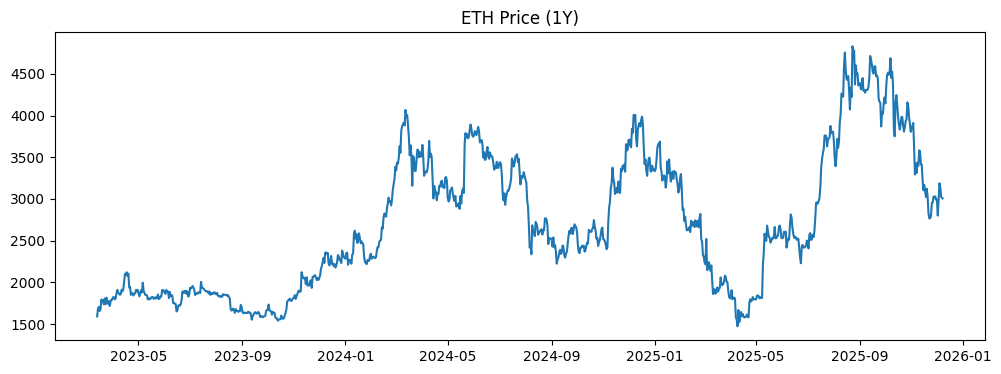

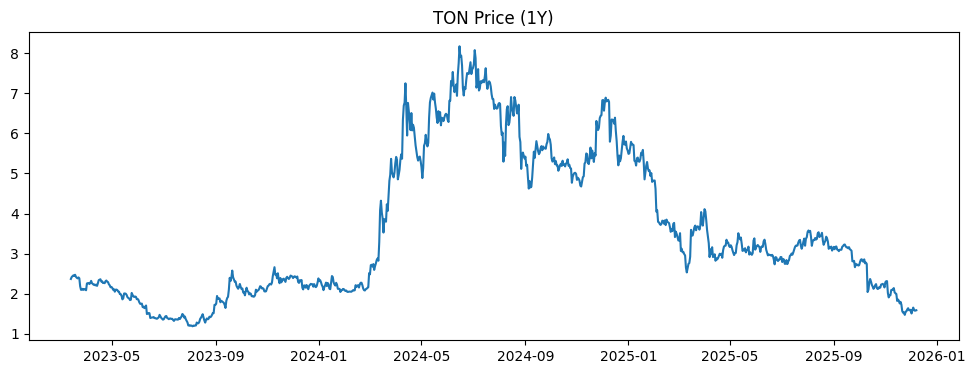

In [30]:
plt.figure(figsize=(12,4))
plt.plot(df1['eth_price'])
plt.title("ETH Price (1Y)")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df2['ton_price'])
plt.title("TON Price (1Y)")
plt.show()

In [31]:
# Define date boundaries
start_date = "2024-12-07"
end_date   = "2025-12-07"

In [32]:
df1_1y = df1.loc[start_date:end_date]
df2_1y = df2.loc[start_date:end_date]

In [33]:
print(df1_1y.head())
print(df1_1y.tail())

print(df2_1y.head())
print(df2_1y.tail())

                       eth_price    eth_volume
timestamp                                     
2024-12-07 04:00:00  4006.028689  2.257464e+10
2024-12-08 04:00:00  4007.690582  2.094338e+10
2024-12-09 04:00:00  4006.101685  5.702983e+10
2024-12-10 04:00:00  3719.000477  5.841642e+10
2024-12-11 04:00:00  3631.276170  3.596805e+10
                       eth_price    eth_volume
timestamp                                     
2025-12-03 04:00:00  2997.801490  2.994930e+10
2025-12-04 04:00:00  3188.343443  2.743499e+10
2025-12-05 04:00:00  3134.357504  2.800027e+10
2025-12-06 04:00:00  3024.487441  1.096282e+10
2025-12-07 20:11:00  3006.113203  1.406318e+10
                     ton_price    ton_volume
timestamp                                   
2024-12-07 04:00:00   6.809404  2.632685e+08
2024-12-08 04:00:00   6.840047  2.434372e+08
2024-12-09 04:00:00   6.789651  7.045727e+08
2024-12-10 04:00:00   5.794447  6.125599e+08
2024-12-11 04:00:00   5.945483  3.376087e+08
                     ton_pr

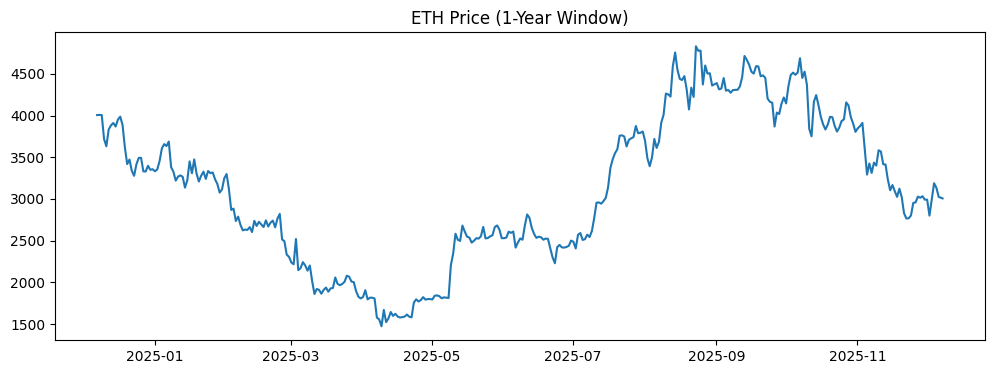

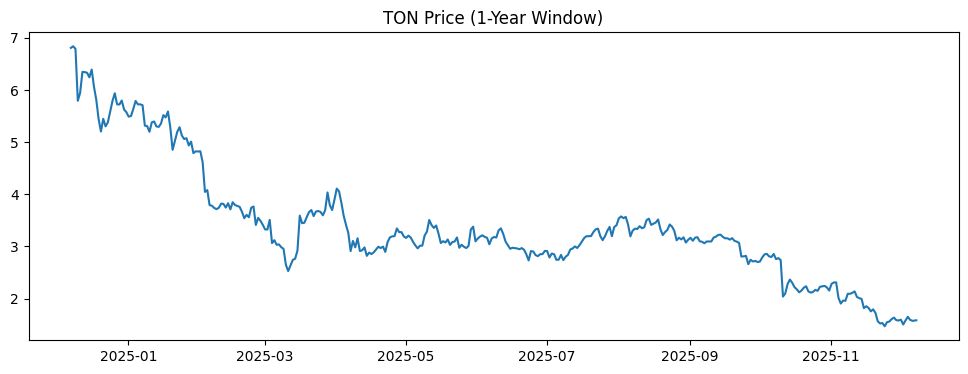

In [34]:
plt.figure(figsize=(12,4))
plt.plot(df1_1y['eth_price'])
plt.title("ETH Price (1-Year Window)")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df2_1y['ton_price'])
plt.title("TON Price (1-Year Window)")
plt.show()
